In [22]:
# coding: utf8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud

%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif']= ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [2]:
orig_df = pd.read_excel('./tmail_data.xlsx')

In [3]:
orig_df

,用户名,发表日期,标题,内容
0,豆***豆,2017-07-23 06:42:02,金盏花爽肤水250ml 平衡水油 舒缓痘痘,敏感混合偏油，用着很舒服，很快就吸收，一点也不油腻
1,佳***9,2017-06-21 21:03:08,【11.19】牛油果眼霜14/28g 舒缓眼周,很好 很水润
2,芳***代,2017-09-20 08:40:15,集焕白均衡亮肤淡斑精华液30ml 淡斑美白提亮,包装不错，物流发的顺丰，第二天到了。第一次用，效果总可以再评价。
3,于***4,2017-11-08 09:32:56,高保湿清爽洁面乳150ml 清爽洁面,洗完后不紧绷，洗感还不错。
4,h***1,2017-08-23 12:21:03,金盏花爽肤水250ml 平衡水油 舒缓痘痘,要是能和专卖店同步积分就好了。
5,哈***哈,2017-11-08 10:32:39,蓝色草本净肤水 250ml 控油保湿滋润,用完以后精致肌肤感觉很爽
6,豆***豆,2017-07-23 06:42:02,高保湿清爽面霜50ml 清爽保湿无负担,感觉很棒，在空调房里很适合啊，客服jameskirk 态度超好的
7,春***王,2017-10-07 18:19:45,亚马逊白泥净肤面膜142g 白泥净肤 清洁毛孔,好
8,木***爱,2017-06-28 21:03:08,1号护唇膏15ml 滋润防护 唇部打底,好
9,尘***宝,2017-07-19 17:25:49,1号护唇膏15ml 滋润防护 唇部打底,千万别手贱撕标签纸，能改改这个设计么？


In [4]:
cut_func = lambda s: ' '.join(jieba.cut(str(s)))

In [5]:
orig_df['cut'] = orig_df['内容'].apply(cut_func)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/l_/00q411m561s8nfldd8j6tw4c0000gn/T/jieba.cache
Loading model cost 1.271 seconds.
Prefix dict has been built succesfully.


In [6]:
orig_df['words_cnt'] = orig_df['cut'].apply(lambda s: len(s.split(' ')))

In [ ]:
orig_df.head()

In [24]:
wc_img = WordCloud(
        font_path='/Library/Fonts/Microsoft/SimHei.ttf',
    ).generate(' '.join(orig_df['cut'].values))

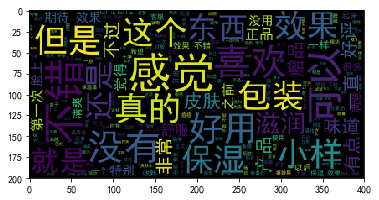

In [25]:
plt.imshow(wc_img)

In [8]:
count_vectorizer = CountVectorizer()
count_res = count_vectorizer.fit_transform(orig_df['cut'])

In [10]:
bool_matrix = np.where(count_res.toarray() > 0, 1, 0)
words_cnt_matrix = bool_matrix * orig_df[['words_cnt']].values
avg_wc = words_cnt_matrix.sum(axis=0) / bool_matrix.sum(axis=0)

In [11]:
word_df = pd.DataFrame({
        'times': bool_matrix.sum(axis=0),
        'avg_wc': avg_wc,
    }, index=count_vectorizer.get_feature_names())

In [12]:
word_df.sort_values('times', ascending=False)

,avg_wc,times
不错,15.250518,2415
效果,22.634598,2162
包装,23.693783,1721
感觉,29.005079,1575
没有,30.933600,1250
喜欢,22.127835,970
好用,14.479409,947
保湿,26.528908,934
可以,23.782562,929
小样,31.050314,795


In [13]:
cnt_df = orig_df.iloc[:, :6]

In [14]:
cnt_df[count_vectorizer.get_feature_names()] = pd.DataFrame(count_res.toarray())

In [15]:
cnt_df[cnt_df['没有'] >= 1]

,用户名,发表日期,标题,内容,cut,words_cnt,01ay,10,100,1000,...,鼓起勇气,鼓起来,鼻周,鼻头,鼻子,鼻梁,鼻翼,齐全,龟苓膏,龟速
32,t***1,2017-07-09 08:21:22,0,0,此 用户 没有 填写 评论 !,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,我***吃,2017-07-23 13:13:48,0,0,超级 好用 ！ 我 是 从小到大 没有 过润润 的 嘴 ， 一直 是 全是 皮 ， 每天 就...,67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,b***m,2017-08-06 13:23:58,0,0,很香 ， 包装 很 精美 。 之前 用 的 是 朗 仕 的 爽肤水 ， 按照 价格 来说 和...,65,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,w***8,2017-06-15 12:55:33,0,0,没有 包装 管口 连 封护 贴 都 没有 不过 倒 是 挺好用 一点点 可以...,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,w***7,2017-08-27 10:13:54,0,0,假货 ， 广大 买家 自己 看吧 ， 右边 是 专柜 买 的 ， 味道 ， 英文字母 ， 图...,69,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,w***n,2017-08-20 15:47:10,0,0,没有 送 赠品 小样 ， 有点 不 开心,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,朱***卿,2017-09-13 12:37:41,0,0,第一次 买 正装 ， 发货 是 顺丰 ， 盒子 也 特别 漂亮 。 但是 ！ 为什么 要 送...,41,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,e***装,2017-09-13 13:06:10,0,0,挺 好 的 ， 就是 没有 大 瓶装,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,水***9,2017-09-15 11:32:00,0,0,此 用户 没有 填写 评论 !,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176,共***深,2017-09-16 10:25:26,0,0,此 用户 没有 填写 评论 !,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_res = tfidf_vectorizer.fit_transform(orig_df['cut'])
# orig_df[tfidf_vectorizer.get_feature_names()] = pd.DataFrame(tfidf_res.toarray())

In [ ]:
# kmeans = KMeans(5)
# kmeans_res = kmean.fit_transform(orig_df[tfidf_vectorizer.get_feature_names()])
# orig_df['kmeans_label'] = kmeans.labels_
# # orig_df[['kmeans_label']].to_excel('./kmeans_label.xlsx', index=False)